#HW1



In [36]:
# import library
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, exp, pi, acos

In [37]:
def drawpicture(x, y, title, xlabel, ylabel, errorRate = False):
  if errorRate:
    plt.plot(x, y, marker = '.')
  else:
    plt.plot(x, y)
  plt.grid(True)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

#2. 

$f(x)= 10 \cos \left( \frac {3\pi}{2}x \right) e^{-x} + x^6 - 1$
  
  a).

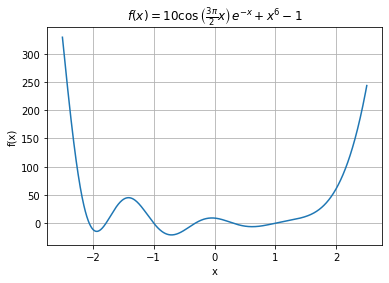

In [38]:
def fun(x):
  return 10 * cos(3*pi*x/2) * exp(-x) + x**6 - 1
x = np.linspace(-2.5, 2.5, 1024)
y = np.vectorize(fun)(x)

drawpicture(x, y, "$f(x)= 10 \cos \left( \\frac {3\pi}{2}x \\right) e^{-x} + x^6 - 1$", 'x', 'f(x)')

Approximate way: bisection and false position

In [39]:
def Approx(lowerBound, upperBound, way):
  print('Iteration', '  xl', '    xu', '    xr', '   er(%)')
  print('-------------------------------------')
  l, u, errorRate, xPre, i = lowerBound, upperBound, 100, upperBound, 1
  errorRateList = list()
  while errorRate >= 0.2:
    preL, preU = lowerBound, upperBound
    if way == 'bisection':
      xMid = (upperBound + lowerBound)/2
    elif way == 'false position':
      xMid = upperBound - fun(upperBound)*(upperBound - lowerBound)/(fun(upperBound) - fun(lowerBound))
    yMid = fun(xMid)
    if(yMid * fun(lowerBound) > 0):
      lowerBound = xMid
    elif(yMid * fun(upperBound) > 0):
      upperBound = xMid
    if i != 1:
      errorRate = 100 * abs(xMid - xPre)/xMid
    print('  %2d'%i, '    %.4f'%preL, '%.4f'%preU, '%.4f'%xMid, '%.3f'%errorRate)
    xPre = xMid
    errorRateList.append(errorRate)
    i += 1
  drawpicture(range(1, i), errorRateList, "Curves of relative error using "+way+" in ["+str(l)+", "+str(u)+"]", 'Iteration', 'Error Rate (%)', errorRate = True)

b). find the root in bracket [0, 0.5]

Using Bisection
Iteration   xl     xu     xr    er(%)
-------------------------------------
   1     0.0000 0.5000 0.2500 100.000
   2     0.2500 0.5000 0.3750 33.333
   3     0.2500 0.3750 0.3125 20.000
   4     0.2500 0.3125 0.2812 11.111
   5     0.2812 0.3125 0.2969 5.263
   6     0.2969 0.3125 0.3047 2.564
   7     0.2969 0.3047 0.3008 1.299
   8     0.3008 0.3047 0.3027 0.645
   9     0.3027 0.3047 0.3037 0.322
  10     0.3037 0.3047 0.3042 0.161


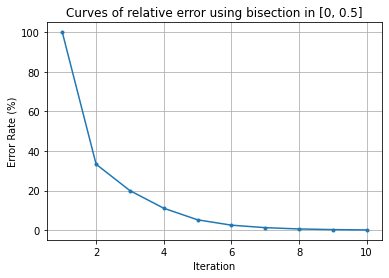

In [40]:
print("Using Bisection")
Approx(0, 0.5, "bisection")

Using false position
Iteration   xl     xu     xr    er(%)
-------------------------------------
   1     0.0000 0.5000 0.3153 100.000
   2     0.0000 0.3153 0.3025 4.211
   3     0.3025 0.3153 0.3045 0.647
   4     0.3025 0.3045 0.3045 0.005


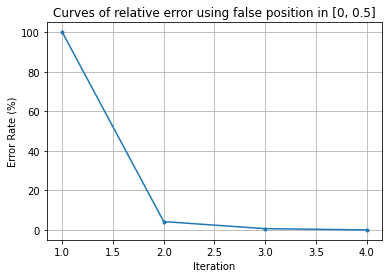

In [41]:
print("Using false position")
Approx(0, 0.5, "false position")

c). find the root in bracket [0.5, 2]

Using Bisection
Iteration   xl     xu     xr    er(%)
-------------------------------------
   1     0.5000 2.0000 1.2500 100.000
   2     0.5000 1.2500 0.8750 42.857
   3     0.8750 1.2500 1.0625 17.647
   4     0.8750 1.0625 0.9688 9.677
   5     0.9688 1.0625 1.0156 4.615
   6     0.9688 1.0156 0.9922 2.362
   7     0.9922 1.0156 1.0039 1.167
   8     0.9922 1.0039 0.9980 0.587
   9     0.9980 1.0039 1.0010 0.293
  10     0.9980 1.0010 0.9995 0.147


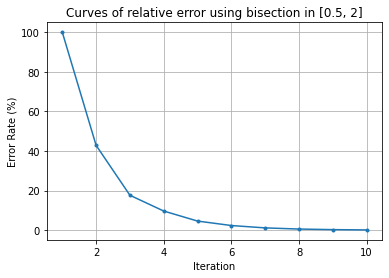

In [42]:
print("Using Bisection")
Approx(0.5, 2, "bisection")

false position

Using false position
Iteration   xl     xu     xr    er(%)
-------------------------------------
   1     0.5000 2.0000 0.6182 100.000
   2     0.6182 2.0000 0.7443 16.948
   3     0.7443 2.0000 0.8432 11.719
   4     0.8432 2.0000 0.9060 6.934
   5     0.9060 2.0000 0.9433 3.961
   6     0.9433 2.0000 0.9655 2.299
   7     0.9655 2.0000 0.9789 1.363
   8     0.9789 2.0000 0.9870 0.822
   9     0.9870 2.0000 0.9920 0.501
  10     0.9920 2.0000 0.9950 0.308
  11     0.9950 2.0000 0.9969 0.190


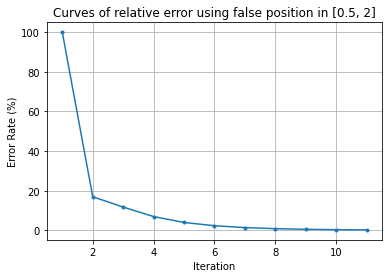

In [43]:
print("Using false position")
Approx(0.5, 2, "false position")

##3.
a) Roation Matrix

In [44]:
def RotationMatrix(vector, theta):
  return np.array([[0, 0, 0], [0, cos(theta*pi/180), sin(theta*pi/180)], [-sin(theta*pi/180), 0, cos(theta*pi/180)]]).dot(vector)

b) Magnitude Modulation

In [45]:
def magnitudeModulation(t, vector, T1, T2):
  return np.array([vector[0]*exp(-t/T2), vector[1]*exp(-t/T2), vector[2]*exp(-t/T1)]) + np.array([[0], [0], [1-exp(-t/T1)]])

c) MRI function

$S^+=f(\theta, t, S^-, T1, T2)$

In [46]:
def MRIfunction(theta, t, vector, T1, T2):
  S = magnitudeModulation(t, RotationMatrix(vector, theta), T1, T2)
  return (S[0]**2+S[1]**2)**0.5, np.array([[0], [0], S[2]])

d) 500 times iterations

In [47]:
def Iteration(iter, theta, t, vector, T1, T2):
  Sxy = 0
  for i in range(iter):
    Sxy, vector = MRIfunction(theta, t, vector, T1, T2)
  return Sxy

e) figure simulation result

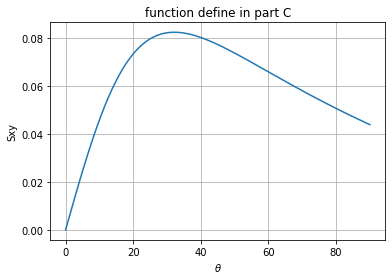

In [48]:
theta = np.linspace(0, 90, 512)
vectorLen = list()
for t in theta:
  vectorLen.append(Iteration(500, t, 250, np.array([[0], [0], [1]]), 1500, 200))
drawpicture(theta, vectorLen, "function define in part C", '$\\theta$', 'Sxy')

f) Use centered finite-difference approach to approximate and illustrate g(θ) in a figure

Approximate solution is 32.2


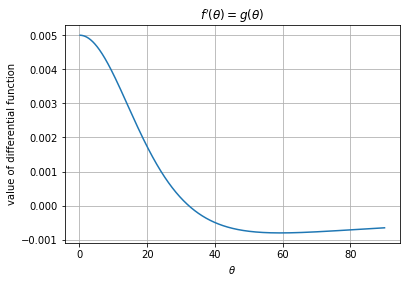

In [49]:
h , theta, mintheta = 0.1, 0.1, 0.1
thetaList, valueList = list(), list()
minvalue = (Iteration(500, mintheta+h, 250, np.array([[0], [0], [1]]), 1500, 200) - Iteration(500, mintheta-h, 250, np.array([[0], [0], [1]]), 1500, 200))/(2*h)
while theta <= 90:
  value = (Iteration(500, theta+h, 250, np.array([[0], [0], [1]]), 1500, 200) - Iteration(500, theta-h, 250, np.array([[0], [0], [1]]), 1500, 200))/(2*h)
  if abs(value) < abs(minvalue):
    mintheta = theta
    minvalue = value
  theta += h
  thetaList.append(theta)
  valueList.append(value)
  #print(theta, value)
print('Approximate solution is %.1f'%mintheta)
drawpicture(thetaList, valueList, "$f'(\\theta)=g(\\theta)$", '$\\theta$', 'value of differential function')

g) Use the Golden-section search to approximate and illustrate g(θ)

In [50]:
goldenRatio = (1 + 5**0.5)/2
upperBound, lowerBound, errorRate, i, xPre = 90, 0, 1, 1, 0
print('Iteration', '  xl', '    xu', '   er')
while errorRate >= 0.003:
  preL, preU = lowerBound, upperBound
  d = (goldenRatio - 1) * (upperBound - lowerBound)
  x1, x2 = lowerBound + d, upperBound - d
  y1, y2 = Iteration(500, x1, 250, np.array([[0], [0], [0]]), 1500, 200), Iteration(500, x2, 250, np.array([[0], [0], [0]]), 1500, 200)
  
  if y2 < y1:
    lowerBound = x2
  else:
    upperBound = x1
  if i != 1:
    errorRate = abs(x1 - xPre)/x1
  print('  %2d'%i, '    %2.4f'%preL, '%2.4f'%preU, '%.3f'%errorRate)
  xPre = x1
  i += 1

Iteration   xl     xu    er
   1     0.0000 90.0000 1.000
   2     0.0000 55.6231 0.618
   3     21.2461 55.6231 0.191
   4     21.2461 42.4922 0.236
   5     29.3614 42.4922 0.083
   6     29.3614 37.4767 0.090
   7     29.3614 34.3769 0.059
   8     31.2772 34.3769 0.022
   9     31.2772 33.1929 0.023
  10     31.2772 32.4612 0.014
  11     31.7294 32.4612 0.005
  12     32.0089 32.4612 0.003
  13     32.0089 32.2884 0.003
  14     32.1157 32.2884 0.001


h)analytical solution is $\\arc(e^{-t/T1})$

In [51]:
thetaOpt = acos(exp(-250/1500))
print('Analytical solution is %.5f for t=250, T1=1500.'%(thetaOpt * 180 / pi))

Analytical solution is 32.16896 for t=250, T1=1500.
